# Defense Evasion - Remote Event Service Crash

#### Author: Rifqi Ardia Ramadhan

After gaining administrator privilege, adversaries will try to prevent any trace that will lead back to them. One of the method of doing so is crashing the Event Log Service so any adversary activities will not be logged and the loss will be harder to calculate. One of the method that can crash event log service for 24 hours is from `limbenjamin` that exploit the event service behaviour of handling a NULL pointer. MSRC did not fix this as it will need administrator privilege before exploiting it.

## Use Case
### Objective
Identify if there is any SMB pipe that is trying to down the Event Log service by looking at the traffic network.

### Log Requirements
SMB and DCERPC network traffic

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | Eventlog is accessed via SMB with administrator privileges| | |
|2   | There are both OpenEventLogW and ClearEventLogW side by side || |
|3   | ClearEventLogW have `NULL` value in its Backupfilename parameter | | This is where the crash happened|
|4   | Both characteristics number 2 and 3 happened three consecutive times over short period || This is where the Event Service will go offline for the next 24 hours|

### References
https://attack.mitre.org/techniques/T1562/002/

https://limbenjamin.com/articles/crash-windows-event-logging-service.html

https://gist.github.com/byt3bl33d3r/3658ab04d232caf14949e84525a1bf72

### Sample
Dataset acquired from [PCAP-ATTACK](https://github.com/sbousseaden/PCAP-ATTACK)

This Wireshark filter will help to reduce the amount of labor when hunting:
```
(dcerpc.null_pointer == 00:00:00:00) && (eventlog.opnum == 0)
```
Those basically filters the second pointer (which is backup filename) as `NULL` and with `ClearEventLogW` command.
And then follow each of TCP stream.

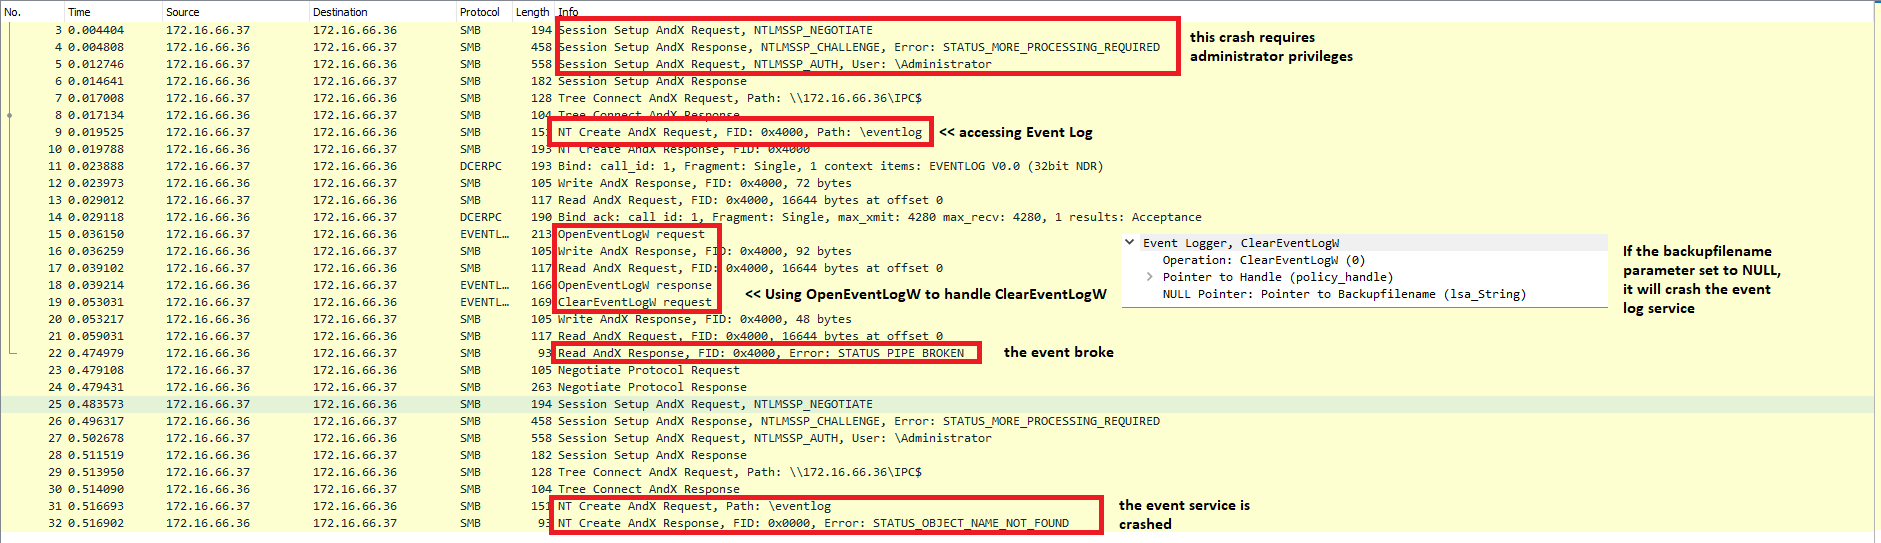

The step above should happen three times before the event service crashed for the next 24 hours.